# Project 5B - Introduction to Linear Regression

Project 5B
1. Using Jupyter and the following: 
    - The equations found under these headings in Zybooks Section 7.2:
        “The least-squares regression line”
        “The correlation coefficient  and least-squares regression”

    - The equation for the regression line: 
        y-hat = 0.488*latitude - 3.704, and 
        calculate the numbers shown in the boxes in Participation Activity 7.2.5.  Notice that the authors use b1 for the slope and bo for y-intercept instead of the more common m and b.

2. Since we now know that there appears to be a correlation between age and diabetes, using those columns from the nhanes data set, along with the scikit-learn methods found in the Jupyter exercise 7.2.1 (Simple Linear Regression in Python), do boxes 1 - 11 and 13.  These use scikit-learn to fit a linear regression line to data and to extract important relationships, like what proportion of diabetes cases are explained by age. 

In [1]:
# Import packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import r_regression

## Crabs

In [2]:
# Import data
crabs = pd.read_csv('crab-groups.csv')

# Store relevant columns as variables
X = crabs[['latitude']].values.reshape(-1, 1)
y = crabs[['mean_mm']].values.reshape(-1, 1)

In [3]:
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

### Slope

In [4]:
slopeCrabs = linModel.coef_
print(slopeCrabs[0][0])

0.488345915733499


### Intercept

In [5]:
interceptCrabs = linModel.intercept_
print(interceptCrabs[0])

-3.7039348302831545


### The Equation for the Regression Line

In [6]:
print(f"Proportion of variation explained by Mean length = {interceptCrabs[0]:.2f} + {slopeCrabs[0][0]:.3f} * (latitude)")

Proportion of variation explained by Mean length = -3.70 + 0.488 * (latitude)


## NHanes

In [7]:
# Import data
nhanes = pd.read_csv('nhanes.csv')
nhanes["Diabetes_num"] = nhanes["Diabetes"].map({"Yes": 1, "No": 0})
nhanes = nhanes.dropna(subset=["Age", "Diabetes_num"])

# Store relevant columns as variables
X = nhanes[['Age']].values.reshape(-1, 1)
y = nhanes[['Diabetes_num']].values.reshape(-1, 1)

Text(0, 0.5, 'Diabetes (yes=1, no=0)')

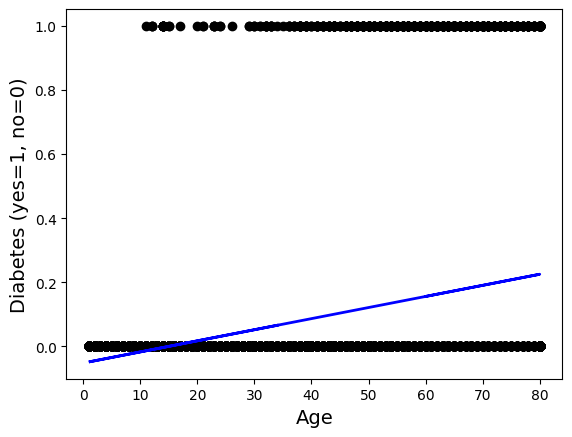

In [8]:
# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Diabetes (yes=1, no=0)', fontsize=14)

In [ ]:
# Graph the residuals
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], yPredicted[i]], color='grey', linewidth=1)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Diabetes (yes=1, no=0)', fontsize=14)

Text(0, 0.5, 'Diabetes (yes=1, no=0)')

In [ ]:
# Output the intercept of the least squares regression
intercept = linModel.intercept_
print(intercept[0])

In [ ]:
# Output the slope of the least squares regression
slope = linModel.coef_
print(slope[0][0])

In [ ]:
# Write the least squares model as an equation
print("Predicted mean length = ", intercept[0], " + ", slope[0][0], "* (latitude)")

In [ ]:
# Compute the sum of squared errors for the least squares model
SSEreg = sum((y - yPredicted) ** 2)[0]
SSEreg

In [ ]:
# Compute the sum of squared errors for the horizontal line model
SSEyBar = sum((y - np.mean(y)) ** 2)[0]
SSEyBar

In [ ]:
# Compute the proportion of variation explained by the linear regression
# using the sum of squared errors
(SSEyBar - SSEreg) / (SSEyBar)

In [ ]:
# Compute the correlation coefficient r
r = r_regression(X, np.ravel(y))[0]
r

In [ ]:
# Compute the proportion of variation explained by the linear regression
# using correlation coefficient
r**2

In [ ]:
# Compute the proportion of variation explained by the linear regression
# using the LinearModel object's score method
linModel.score(X, y)